# Wine Quality Prediction

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to buuild a machine learning model capable of predicting the quality of wine based on their attributes

We're going to take the followeing approach:

Problem definition
Data
Evaluation
Features
Modelling
Experimentation

## 1. Problem Definition¶
Given parameters about a wine, can we predict the quality of the wine?

##  Data
Source:https://archive.ics.uci.edu/ml/datasets/wine+quality

## 3. Evaluation¶
If we can reach 85% accuracy at predicting the qulity of a wine, we'll pursue the project.

## 4. Features
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)



## Preparing the tools
We're going to use pandas, Matplotlib, NumPy and Scklearn for data analysis and manipulation

In [1]:
# Libraries for data loading and data visulisation
import re
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

# Libraries for modelling
#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

#Thi library is useful for resampling our data
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Model Evaluations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
data = pd.read_csv("WineQT.csv")

## Data Exploration (explanatory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to sove?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
#Lets take a look at the first five rows of the dataset for better understanding
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#We willnot be needing the Id colum, so its best we drop it.
data = data.drop(["Id"], axis=1)

In [5]:
#Condirm deletion of Id column
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [6]:
# We confirm numbers of rows and columns contained in the dataset
data.shape

(1143, 12)

In [7]:
# Check to see if the dataset contains missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset hence we cn proceede

In [8]:
# We Check the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


All our columns are numerical, so we are good to implement a machine learning algorithm 

## Brief Statistics of Each columns

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### From the summary of the descriptive statistics
- 1  `Count` indicates the total numbers of rows in each column
- 2  `Mean` Measures central tendency, it describe the sample with a single value that represents the center of the data  
- 3  `Std` Measures variation A low standard deviation means that most of the numbers are close to the mean (average) value. A high standard deviation means that the values are spread out over a wider range. for our dataset, **total sulfur dioxide** is the most spread from the mean, while **density** is closest to the mean
- 4  `Min` is the item with the lowest value
- 5  `25%` also called `First quartile` meaning that 25% of the data falls below the first quartile
- 6  `50%` also called `Second quartile`This is the middle number halfway between the lowest number and the highest number.
- 7  `75%` also claled `Third quartile`This is the number halfway between the middle number and the highest number
- 8  `Max` is the item with the highest value

Soucres:
- 1 https://www.scribbr.com/statistics/quartiles-quantiles/
- 2 https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj6ktH8uq38AhU9U6QEHd-uAiAQFnoECA0QAw&url=https%3A%2F%2Fwww.w3schools.com%2Fpython%2Fref_func_min.asp&usg=AOvVaw29xPRL6CMpc1W_LHlXX2Sf
- 3 https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi7r4HYuq38AhW9_7sIHa04AoYQFnoECBMQAw&url=https%3A%2F%2Fsupport.minitab.com%2Fminitab%2F21%2Fhelp-and-how-to%2Fstatistics%2Fbasic-statistics%2Fhow-to%2Fdisplay-descriptive-statistics%2Finterpret-the-results%2Fall-statistics-and-graphs%2F&usg=AOvVaw2X0iQLnhErCjiSxVzWndGI
- 4 https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjS8eHLuK38AhV2Y6QEHSY_AB8QFnoECBcQAw&url=https%3A%2F%2Fwww.w3schools.com%2Fpython%2Fpython_ml_standard_deviation.asp&usg=AOvVaw2AN7grvOZHo3ruIySqBZGZ

In [10]:
# Check the nature of skewness in the data
data.skew()

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
dtype: float64

`Skew` can be either positive or negative. A positive skew will indicate that the tail is on the right side. It will extend toward the most positive values. On the other hand, a negative skew will indicate a tail on the left side and will extend to the more negative side. **All the values are ppositively skewed with `Chlrides`being the most positively skewed while `density` is the least positively skewed with nearly `normal distribution`**

In [11]:
# Check for outliers in the dataset
data.kurtosis() 

fixed acidity            1.384614
volatile acidity         1.375531
citric acid             -0.714686
residual sugar          27.675366
chlorides               47.078324
free sulfur dioxide      1.932170
total sulfur dioxide     5.098748
density                  0.888123
pH                       0.925791
sulphates               12.017377
alcohol                  0.221179
quality                  0.314664
dtype: float64

`kurtosis` is a measure of relative peakedness of a probability distribution, or alternatively how heavy or how light its tails are. A value of kurtosis describes how different the tails of a given probability distribution are from a normal distribution.

- **Positive excess kurtosis** — when excess kurtosis, given by (kurtosis-3), is positive, then the distribution has a sharp peak and is called a leptokurtic distribution.
- **Negative excess kurtosis** — when excess kurtosis, given by (kurtosis-3), is negative, then the distribution has a flat peak and is called a platykurtic distribution.
- **Zero excess kurtosis** — when excess kurtosis, given by (kurtosis-3), is zero, then the distribution follows a normal distribution and is also called a mesokurtic distribution.

For our dataset, `Chlorides`, `Residual sugar`, `Sulphates`, `total sulfur dioxide` have propability of heavly distributed from a normal. Meaning they have tendency of high outliers  

https://miro.medium.com/max/1400/1*wv4RQCB1ddHSmaXaYjkOXg.webp

## Univariant Analysis

In [12]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [13]:
num_feat = data.select_dtypes(exclude = 'object')

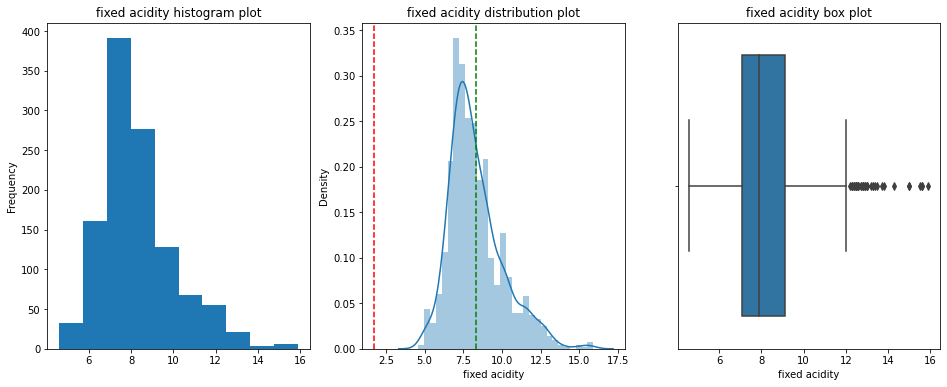

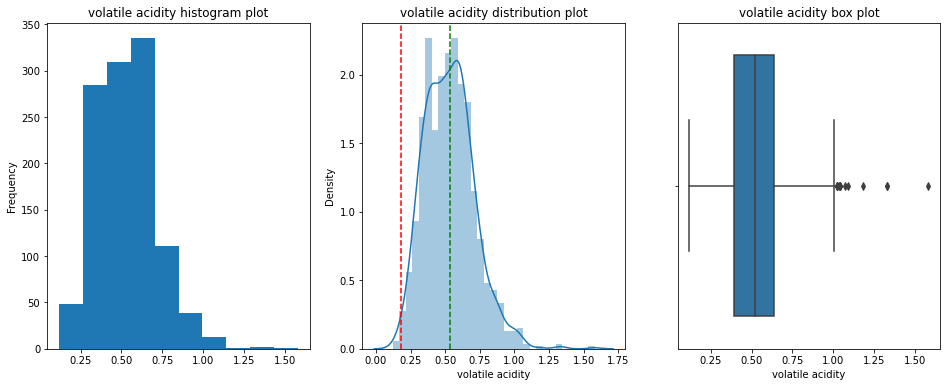

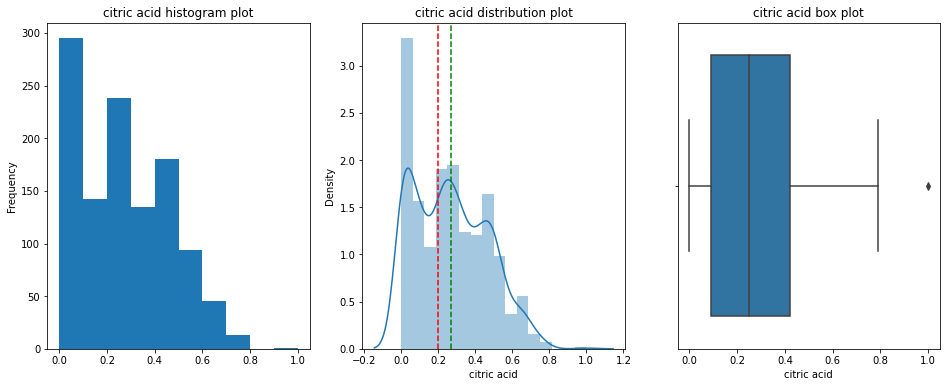

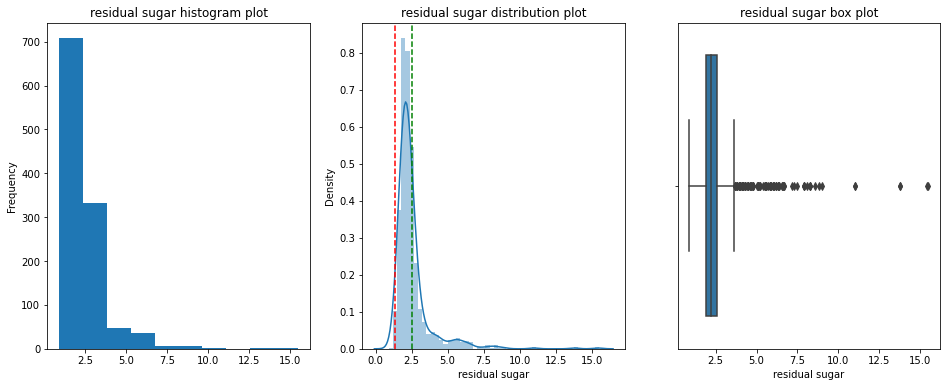

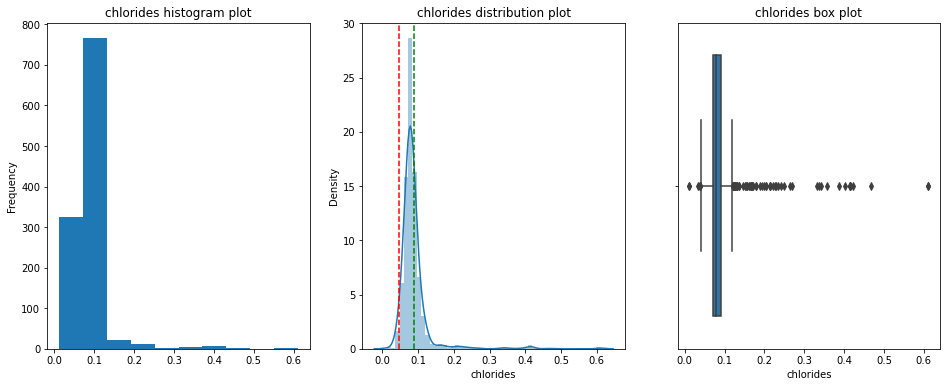

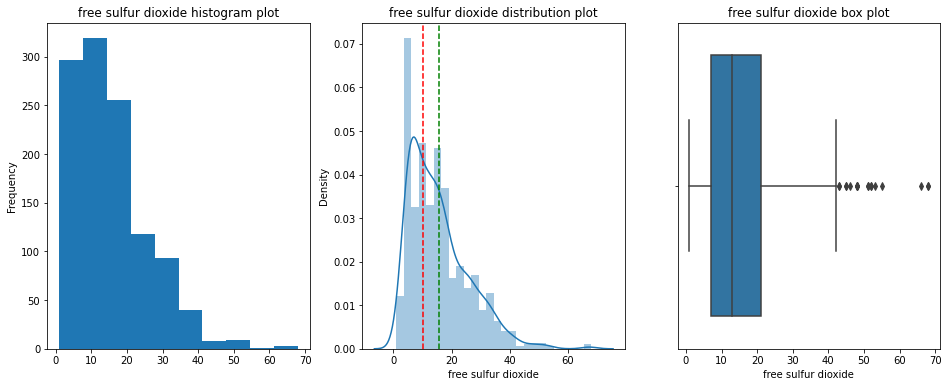

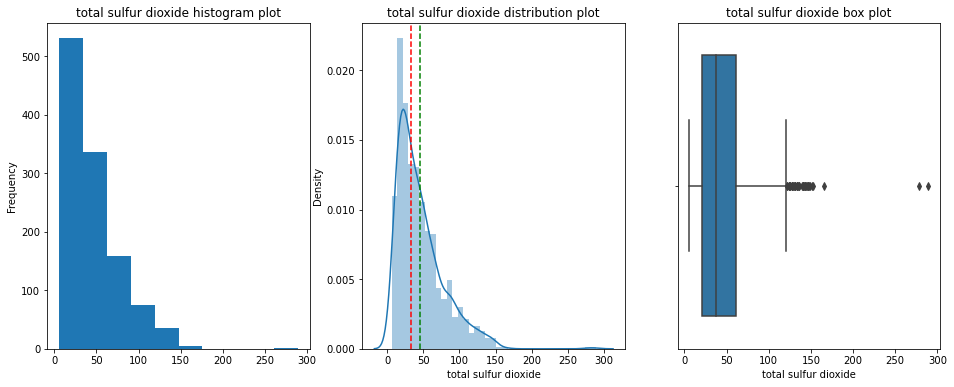

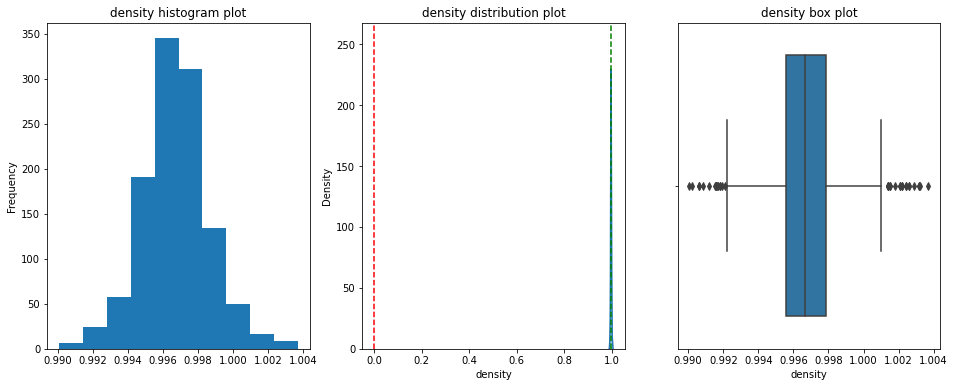

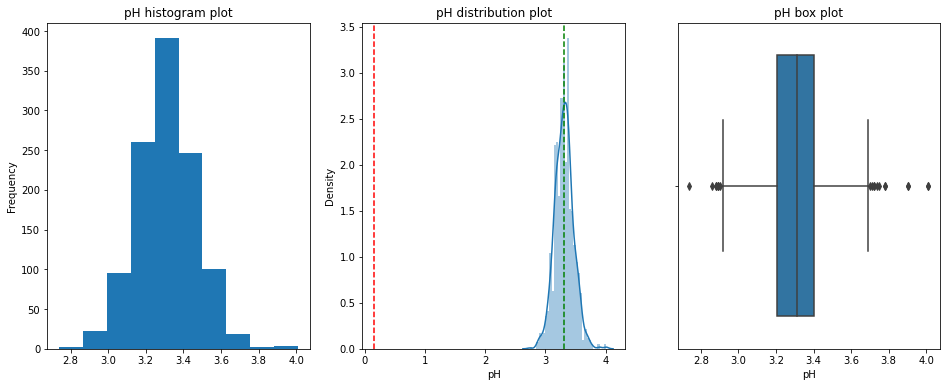

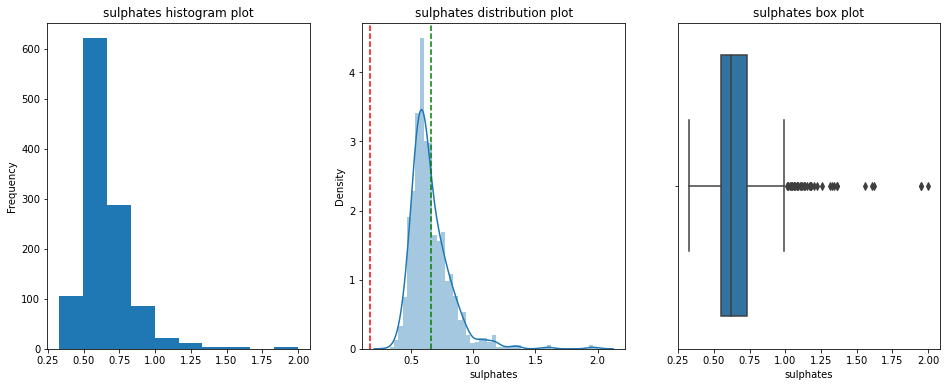

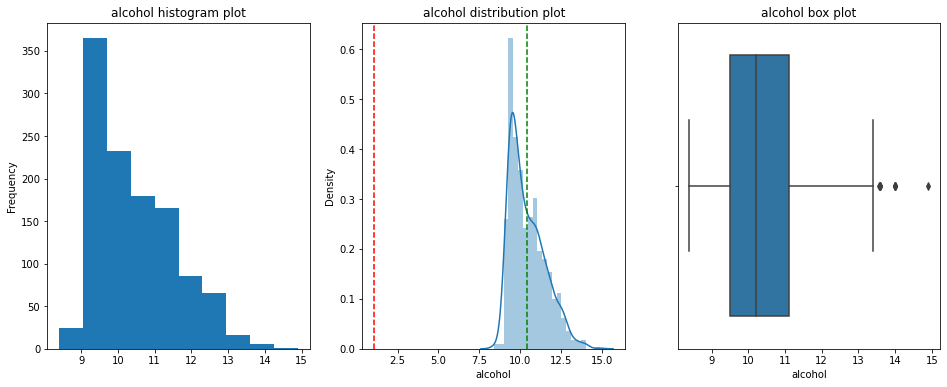

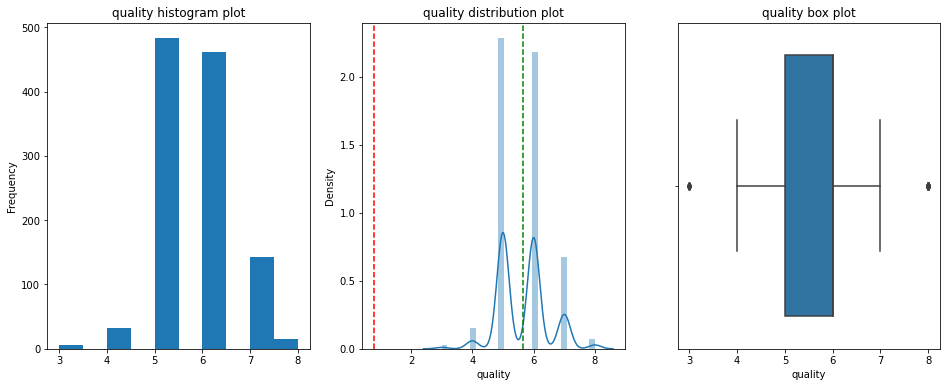

In [14]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

#### Observations

- 1 .From the Histogram plots and the distribution plots, all the colums can be seen to be positively skwed
- 2 . The Box plots shows the minimun, 1st quartile, second quartile, mean, third quartile and the maximum values of each columns. Also, the presence oof outliers can be noticed mostespecially in `Chlorides`, `Residual sugar`, `Sulphates`and `total sulfur dioxide`as already indicated by the kurtosis

## Multivariant Analysis:

Bivariate Analysis is used to find the relationship between two variables. Analysis can be performed for combination of categorical and continuous variables. Scatter plot is suitable for analyzing two continuous variables. It indicates the linear or non-linear relationship between the variables.

In [15]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

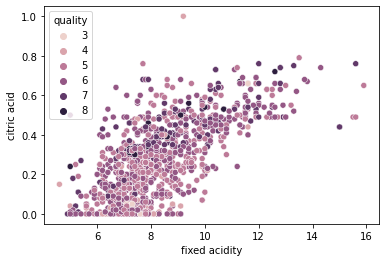

In [16]:
sns.scatterplot(data = data, x = data['fixed acidity'], y = 'citric acid', hue='quality');

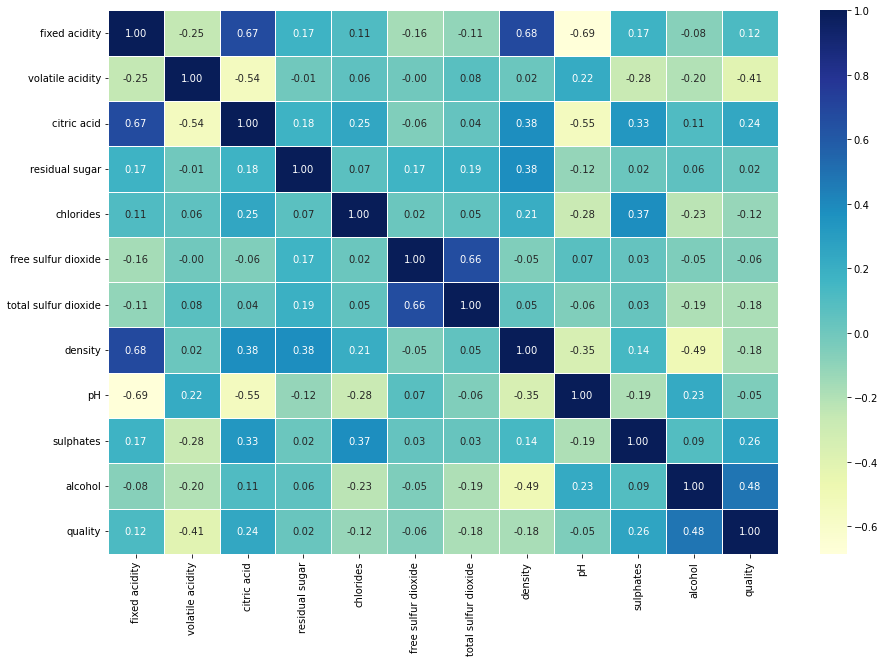

In [17]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [18]:
# Lets find out how many of each class there are
data["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

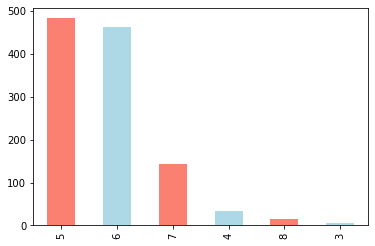

In [19]:
data["quality"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

## Split dataset

In [20]:
X = data.drop('quality', axis=1)
y = data['quality']

## Standardize and split data

In [21]:
#Standarise the data
standard_scaler = StandardScaler()
X_transformed = standard_scaler.fit_transform(X)

In [22]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.30, random_state=42)

### Training The Model 
Now we have our data split into training and test sets, its time to build a machine learning model. 
We'll train it (find the patterns) on the training set
And we'll test it (use the patterns) on the test set

We're going to try 7 different machine learning models for now:

1. Logistic regression
2. K-Nearest Neighbours Classifiers
3. Randoom Forest Classifier
4. AdaBoost Classifier
5. Lagrangian Support Vector Machine (LSVM)
6. Radial Basis Function
7. Decision Tree

In [23]:
# Put modelsin a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(3),
         "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
          "AdaBoost":AdaBoostClassifier(),
         "LSVM": SVC(kernel="linear", C=0.025),
         "RBF SVM": SVC(gamma=2, C=1),
         "Decision Tree": DecisionTreeClassifier(max_depth=5)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    # name is the key and model is the value of our dictionry
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [24]:
# Lets evaluate our models and see how they performed
import time

model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.6180758017492711,
 'KNN': 0.48104956268221577,
 'Random Forest': 0.6122448979591837,
 'AdaBoost': 0.5072886297376094,
 'LSVM': 0.5830903790087464,
 'RBF SVM': 0.5830903790087464,
 'Decision Tree': 0.597667638483965}

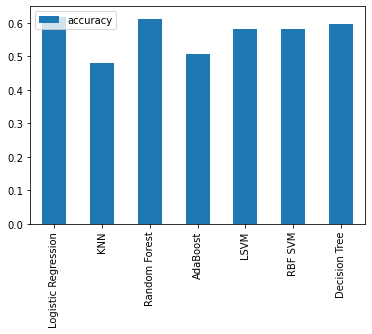

In [25]:
model_comapre = pd.DataFrame(model_scores, index=["accuracy"])
model_comapre.T.plot.bar();

## Training the logistic regression model on balanced data

## Note
- first install the imblearn library as we shall be using it to balance our categorical data
- **use:** pip install -U imbalanced-learn

In [26]:
#Before Implementing resampling
X.shape,y.shape

((1143, 11), (1143,))

In [27]:
#We import he SMOTETomek from imblearn library
from imblearn.combine import SMOTETomek 
# Creat a varable called smk and store the library we shall use to balance our data
smk = SMOTETomek(random_state=42)
#fit our x and y data to the resampler
X_res, y_res = smk.fit_resample(X_transformed,y)

In [28]:
# Check the shape of our new dataset
X_res.shape,y_res.shape, X.shape, y.shape

((2814, 11), (2814,), (1143, 11), (1143,))

In [29]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

In [30]:
# Put modelsin a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(3),
         "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
          "AdaBoost":AdaBoostClassifier(),
         "LSVM": SVC(kernel="linear", C=0.025),
         "RBF SVM": SVC(gamma=2, C=1),
         "Decision Tree": DecisionTreeClassifier(max_depth=5)}

# Create a function to fit and score models
def fit_and_score_res(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores_res = {}
    # Loop through models
    # name is the key and model is the value of our dictionry
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores_res[name] = model.score(X_test, y_test)
    return model_scores_res
        

In [31]:
# Lets evaluate our models and see how they performed
import time

model_scores_res = fit_and_score_res(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores_res

{'Logistic Regression': 0.6378698224852071,
 'KNN': 0.8011834319526627,
 'Random Forest': 0.6733727810650888,
 'AdaBoost': 0.3207100591715976,
 'LSVM': 0.6,
 'RBF SVM': 0.8816568047337278,
 'Decision Tree': 0.5727810650887574}

## Compare performance
**Unbalanced VS Balanced**

In [32]:
model_scores, model_scores_res

({'Logistic Regression': 0.6180758017492711,
  'KNN': 0.48104956268221577,
  'Random Forest': 0.6122448979591837,
  'AdaBoost': 0.5072886297376094,
  'LSVM': 0.5830903790087464,
  'RBF SVM': 0.5830903790087464,
  'Decision Tree': 0.597667638483965},
 {'Logistic Regression': 0.6378698224852071,
  'KNN': 0.8011834319526627,
  'Random Forest': 0.6733727810650888,
  'AdaBoost': 0.3207100591715976,
  'LSVM': 0.6,
  'RBF SVM': 0.8816568047337278,
  'Decision Tree': 0.5727810650887574})

## Hypperparameter tuning

Now we've got a baseline model.... we know a model's first
predictions aren't always what we should based our next steps off.
what should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confussion matrix
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

In [33]:
# Let's tune KNN
train_score = []
test_score = []

# Create a list of different valus for n_neighbours
neighbors = range(1, 21)

#Setup KNNinstance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_score.append(knn.score(X_test, y_test))

In [34]:
train_score

[1.0,
 0.9426104621635348,
 0.9024885728796344,
 0.8750634840020315,
 0.8557643473844592,
 0.840528186896902,
 0.8257998984255968,
 0.8202133062468258,
 0.814118842051803,
 0.803453529710513,
 0.8054850177755206,
 0.7963433214829863,
 0.7887252412392077,
 0.7836465210766886,
 0.7800914169629254,
 0.7719654647028948,
 0.7592686642965972,
 0.7587607922803453,
 0.7546978161503302,
 0.7521584560690706]

In [35]:
test_score

[0.8733727810650888,
 0.8165680473372781,
 0.8011834319526627,
 0.7869822485207101,
 0.7846153846153846,
 0.7739644970414201,
 0.7739644970414201,
 0.7644970414201183,
 0.757396449704142,
 0.7550295857988165,
 0.7479289940828402,
 0.7396449704142012,
 0.7372781065088757,
 0.7301775147928994,
 0.7301775147928994,
 0.7242603550295857,
 0.7112426035502959,
 0.7041420118343196,
 0.6958579881656805,
 0.6828402366863905]

Maximum KNN score onthe test data: 87.34%


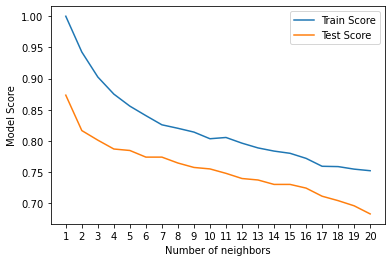

In [36]:
plt.plot(neighbors, train_score, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score onthe test data: {max(test_score)*100:.2f}%")

## Tuning with RandomizedSearchCV 

In [37]:
# Create a hyperparameters for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["saga"]}

# Create a hyperparameter gridfor RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}


In [38]:
#Tune LogisticRegression

np.random.seed(42)

# Setup random hyprparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['saga']},
                   verbose=True)

In [39]:
# To check the best parmeters obtained by the hyperparameter test
rs_log_reg.best_params_

{'solver': 'saga', 'C': 1.623776739188721}

In [40]:
rs_log_reg.score(X_test, y_test),  model_scores_res["Logistic Regression"]

(0.6378698224852071, 0.6378698224852071)

In [47]:
%%time
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=15,
                          verbose=True)

# Fit random hyperparameter sarch model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: total: 4min 9s
Wall time: 4min 35s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
# To check the best parmeters obtained by the hyperparameter test
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [49]:
# Evaluate the randomizd search RandomizedForest
# Compare this new tunned value to the former
rs_rf.score(X_test, y_test), model_scores["Random Forest"]

(0.8402366863905325, 0.6122448979591837)

## Tuning with GridSearchCV

In [52]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [54]:
# Evaluate the grid searh LogisticRegression model
# Compare result with the original test reesult obtained
gs_log_reg.score(X_test, y_test), model_scores_res["Logistic Regression"]

(0.6118343195266273, 0.6378698224852071)

In [55]:
# # Setup random see
# np.random.seed(42)

# # Setup grid hyperparameter search for RandomForestClassifier
# rg_rf = GridSearchCV(RandomForestClassifier(),
#                     param_grid=rf_grid,
#                     cv=2,
#                     verbose=True)

# # Fit random hyperparameter search for RandomForestClassifier()
# rg_rf.fit(X_train, y_train)

In [66]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.599 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.611 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.581 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.482 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.863 total time=   0.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.888 total time=   0.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.876 total time=   0.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.852 total time=   0.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.812 total time=   0.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.812 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [67]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


## RBF SVM GridSeacrchCv Hyper tuniing Vs Ordinary RBF SVM

In [69]:
grid.score(X_test,y_test), model_scores_res["RBF SVM"]

(0.8781065088757396, 0.8816568047337278)

In [59]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       148
           4       0.93      0.94      0.93       149
           5       0.71      0.71      0.71       139
           6       0.68      0.69      0.69       133
           7       0.95      0.91      0.93       140
           8       0.99      1.00      0.99       136

    accuracy                           0.88       845
   macro avg       0.88      0.88      0.88       845
weighted avg       0.88      0.88      0.88       845



In [70]:
grid_predictions

array([5, 3, 3, 8, 8, 3, 7, 8, 8, 5, 3, 7, 4, 7, 6, 3, 3, 4, 6, 8, 8, 3,
       6, 7, 8, 6, 4, 7, 5, 3, 4, 7, 4, 5, 4, 6, 7, 3, 3, 6, 6, 7, 4, 8,
       5, 6, 8, 8, 7, 6, 6, 3, 8, 3, 8, 4, 4, 5, 3, 8, 4, 3, 3, 3, 3, 4,
       4, 7, 4, 6, 7, 6, 6, 5, 8, 5, 4, 7, 6, 6, 4, 8, 6, 6, 5, 5, 4, 3,
       8, 6, 3, 8, 4, 6, 6, 8, 3, 5, 3, 3, 4, 5, 4, 5, 7, 8, 5, 3, 5, 8,
       5, 8, 6, 6, 3, 5, 7, 3, 4, 5, 5, 4, 7, 3, 5, 7, 4, 8, 7, 3, 3, 7,
       8, 4, 3, 5, 3, 3, 7, 5, 5, 6, 8, 8, 5, 3, 8, 7, 5, 6, 7, 4, 3, 5,
       4, 5, 8, 3, 3, 6, 3, 8, 7, 7, 8, 4, 4, 4, 7, 6, 8, 4, 6, 6, 5, 4,
       6, 3, 6, 7, 5, 5, 4, 6, 6, 5, 3, 7, 6, 8, 6, 3, 4, 4, 4, 7, 7, 3,
       5, 8, 3, 4, 6, 4, 6, 3, 5, 8, 6, 6, 7, 3, 4, 6, 5, 3, 4, 4, 4, 5,
       5, 4, 6, 8, 8, 4, 4, 7, 8, 5, 3, 3, 8, 6, 8, 3, 7, 5, 6, 4, 3, 8,
       6, 8, 7, 4, 7, 8, 4, 7, 7, 3, 4, 6, 7, 7, 7, 7, 3, 5, 7, 4, 3, 3,
       6, 4, 5, 5, 6, 4, 6, 4, 8, 4, 8, 5, 4, 5, 5, 8, 4, 5, 4, 6, 7, 4,
       6, 5, 6, 6, 3, 6, 6, 5, 8, 5, 7, 8, 4, 5, 7,

In [71]:
y_test

450     5
1174    3
1192    3
2424    8
2664    8
       ..
1949    4
1133    3
2098    7
1854    4
1376    3
Name: quality, Length: 845, dtype: int64

In [75]:
# Confusion matrix
print(confusion_matrix(y_test, grid_predictions))

[[148   0   0   0   0   0]
 [  0 140   6   3   0   0]
 [  1   7  99  30   2   0]
 [  0   4  32  92   4   1]
 [  0   0   2  10 127   1]
 [  0   0   0   0   0 136]]


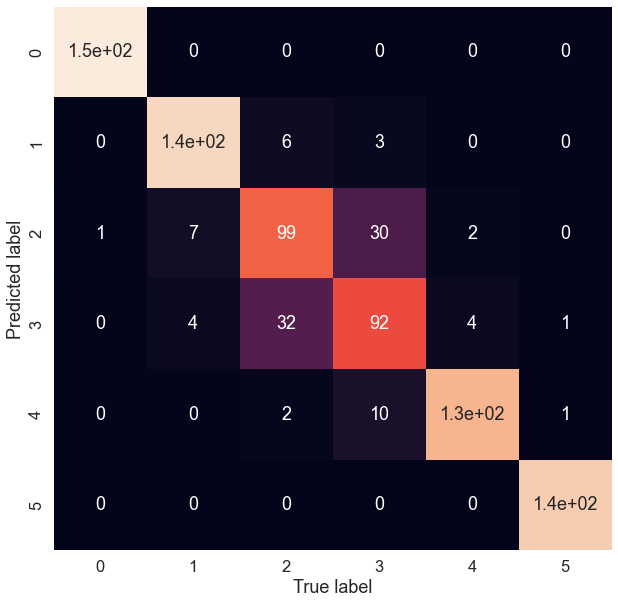

In [77]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, grid_predictions):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(confusion_matrix(y_test, grid_predictions),
                    annot = True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # For older versioin of jupiter noebook with distorted seabon
    # we can adjust by doing he following
     #bottom, top = ax.get_ylim()
     #ax.set_ylim(bottom + 0.5, top -0.5)
    
plot_conf_mat(y_test, grid_predictions)

## Calculate evaluation metrics using cross-validation
We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so, we'll be using cross_val_score()

In [108]:
# Check best hyperparameters
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [111]:
clf = SVC(C=10, gamma=1, kernel='rbf')

In [115]:
# Cross-validated acuracy
cv_acc = cross_val_score(clf,X_res,y_res,cv=5,scoring="accuracy")
cv_acc

array([0.85790409, 0.86500888, 0.86145648, 0.8277087 , 0.87366548])

In [116]:
# Compute the average accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.8571487266360309

In [120]:
precision_score(y_test,grid_predictions, average="weighted")

0.8787013489280872

In [121]:
f1_score(y_test,grid_predictions, average="weighted")

0.8782786893853898

In [122]:
recall_score(y_test,grid_predictions, average="weighted")

0.8781065088757396

In [99]:
n_classes = len(np.unique(y))

In [100]:
n_classes

6

In [127]:
y_train

1760    4
1055    5
2461    8
1533    3
1681    4
       ..
1638    4
1095    3
1130    3
1294    3
860     3
Name: quality, Length: 1969, dtype: int64

### Feature Importance

Feature importance is anoher way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find for feature importance is to search for *(MODEL NAME) feature importance*.



In [136]:
# We remind ourselves of the best LogisticRegression parameter that was obtained
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [138]:
# Fit an instance of the best LogisticRegression
clf = LogisticRegression(C=117.21022975334793,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [139]:
# Check coefficient
clf.coef_

array([[-3.42520324e+00,  4.70637109e+00,  4.79996154e+00,
         4.00219945e-01, -1.33073863e+00,  3.00176112e-02,
        -4.47063342e+00,  1.87600125e+00,  1.16842073e+00,
         9.15423005e-01, -5.53743441e+00],
       [ 6.01355679e-01, -7.91245112e-02, -1.13662930e+00,
         1.32391513e-01,  1.13298459e-01,  7.02146524e-02,
         7.02178130e-03, -2.04058970e-01,  4.79794336e-01,
        -1.10895086e-01, -5.28807798e-01],
       [-9.05559807e-01, -6.49766875e-01, -5.06104485e-01,
        -2.71879656e-01,  3.28262193e-01,  1.32432596e-02,
         7.93955472e-01,  8.23527848e-01, -3.37236785e-01,
        -5.80049597e-01, -4.48495772e-01],
       [ 1.63404312e-01, -9.49080403e-01, -1.00062569e+00,
        -2.98301919e-01,  3.91911945e-01,  2.43315206e-01,
         1.23302003e-01,  5.29912550e-01,  5.10138181e-02,
        -1.03899147e-01,  3.00531058e-01],
       [ 9.30928399e-01, -1.02897231e+00, -3.61585314e-01,
         3.10321331e-01, -1.76036177e-01,  1.75700399e-01,
  

In [141]:
# Match coef's of features to columns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

# The result tells us how much each column contributed to making our predictions
# for the target if someone had heart disease or not

{'fixed acidity': -3.42520323582511,
 'volatile acidity': 4.706371093677843,
 'citric acid': 4.799961542744103,
 'residual sugar': 0.40021994457987276,
 'chlorides': -1.3307386306005726,
 'free sulfur dioxide': 0.030017611189739585,
 'total sulfur dioxide': -4.470633418536567,
 'density': 1.8760012494835103,
 'pH': 1.1684207343897635,
 'sulphates': 0.9154230054651544,
 'alcohol': -5.537434408631274}

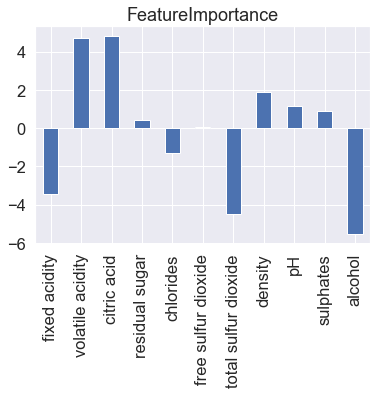

In [142]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="FeatureImportance", legend=False);